In [56]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
sns.set_theme(style="whitegrid")

In [60]:
bristol_df = pd.read_csv("/Users/anukul/Desktop/Anukul/Learning/DataScience/Cleaning/cleaned-data/bristol_schools_cleaned.csv")
cornwall_df = pd.read_csv("/Users/anukul/Desktop/Anukul/Learning/DataScience/Cleaning/cleaned-data/cornwall_schools_cleaned.csv")

Average Attainment 8 Scores for 2021-2022 across Both Counties (Boxplot)

In [61]:
bristol_df['Year'] = bristol_df['Year'].astype(str)
cornwall_df['Year'] = cornwall_df['Year'].astype(str)

In [62]:
bristol_filtered = bristol_df[(bristol_df['Year'] == '2022') & (~bristol_df['ATT8SCR'].isin(['SUPP', 'NE']))]
cornwall_filtered = cornwall_df[(cornwall_df['Year'] == '2022') & (~cornwall_df['ATT8SCR'].isin(['SUPP', 'NE']))]

In [63]:
combinedData = pd.concat([
    bristol_filtered.assign(ATT8SCR=lambda df: pd.to_numeric(df['ATT8SCR'], errors='coerce'), County="Bristol"),
    cornwall_filtered.assign(ATT8SCR=lambda df: pd.to_numeric(df['ATT8SCR'], errors='coerce'), County="Cornwall")
], ignore_index=True)
combinedData

,Postcode,Year,SchName,ATT8SCR,URN,Town,SchoolType,SchLevel,OFSTEDRATING,County
0,BS2 0BA,2022,Andalusia Academy Bristol,58.8,130391,Bristol,Other independent school,Primary,Inadequate,Bristol
1,BS3 2JL,2022,Ashton Park School,46.6,145398,Bristol,Academy sponsor led,Secondary,Good,Bristol
2,BS9 3BA,2022,Badminton School,42.7,109337,Bristol,Other independent school,Primary,Good,Bristol
3,BS13 7DQ,2022,Bedminster Down School,40.6,138204,Bristol,Academy converter,Secondary,Good,Bristol
4,BS10 7QH,2022,Blaise High School,43.3,147219,Bristol,Academy sponsor led,Secondary,Good,Bristol
...,...,...,...,...,...,...,...,...,...,...
65,PL11 2NH,2022,Torpoint Community College,45.6,112041,Torpoint,Foundation school,Secondary,Good,Cornwall
66,TR7 3JA,2022,Treviglas Academy,47.1,145843,Newquay,Academy sponsor led,Secondary,Requires improvement,Cornwall
67,TR1 2HU,2022,Truro High School,50.9,112077,Truro,Other independent school,Primary,Good,Cornwall
68,TR1 1TH,2022,Truro School,37.3,112076,Cornwall,Other independent school,Secondary,Good,Cornwall


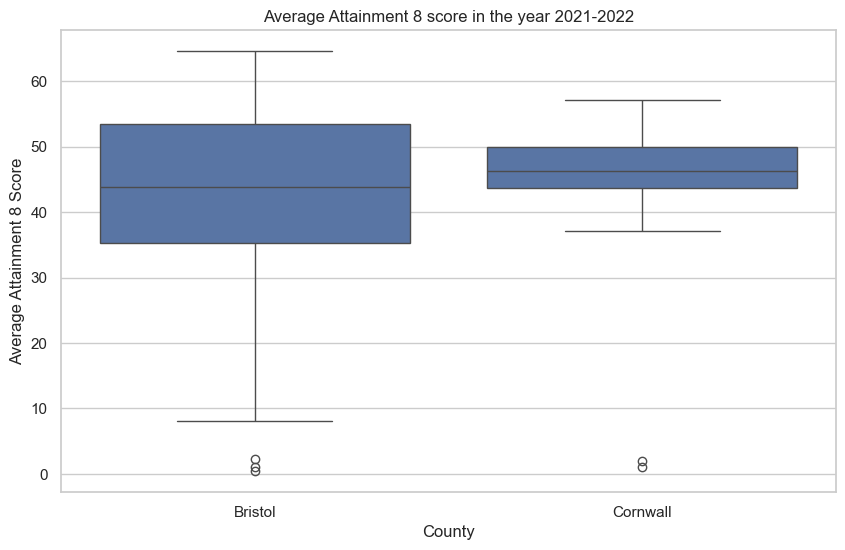

In [64]:
combinedData = (combinedData
    .groupby(['SchName', 'County'], as_index=False)
    .agg(average_ATT8SCR=('ATT8SCR', 'mean'))
)
plt.figure(figsize=(10, 6))
sns.boxplot(x='County', y='average_ATT8SCR', data=combinedData)
plt.title("Average Attainment 8 score in the year 2021-2022")
plt.xlabel("County")
plt.ylabel("Average Attainment 8 Score")
plt.show()
boxplot2022 = px.box(combinedData, x='County', y='average_ATT8SCR', 
                     title="Average Attainment 8 score in the year 2021-2022")
boxplot2022.show()

Line Chart: Average Attainment 8 Scores for Bristol Schools (2021-2022)

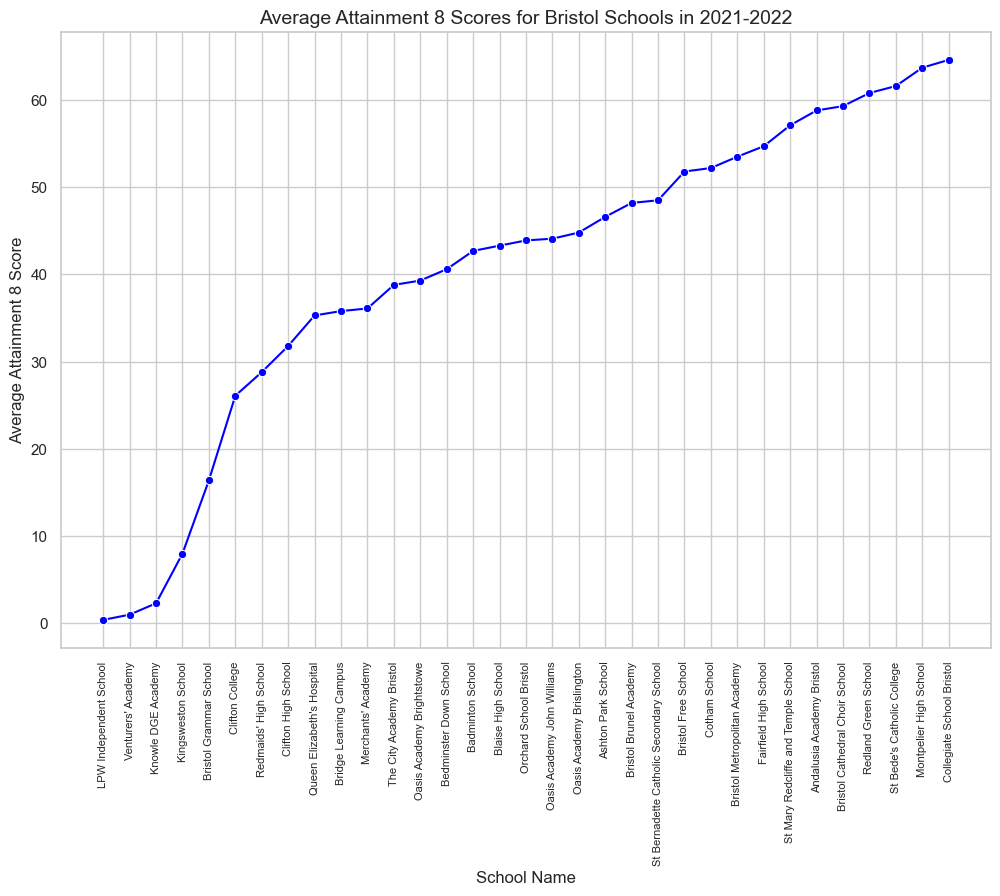

In [65]:
bristolLineChartData = (bristol_df
    .query("Year == '2022' and ATT8SCR not in ['SUPP', 'NE']")
    .assign(ATT8SCR=lambda df: pd.to_numeric(df['ATT8SCR'], errors='coerce'))
    .groupby('SchName', as_index=False)
    .agg(average_ATT8SCR=('ATT8SCR', 'mean'))
)
bristolLineChartData = bristolLineChartData.sort_values('average_ATT8SCR')
bristolLineChartData['SchName'] = pd.Categorical(bristolLineChartData['SchName'], 
                                                 categories=bristolLineChartData['SchName'], 
                                                 ordered=True)
plt.figure(figsize=(12, 8))
sns.lineplot(x='SchName', y='average_ATT8SCR', data=bristolLineChartData, marker='o', color='blue')
plt.xticks(rotation=90, fontsize=8)
plt.title("Average Attainment 8 Scores for Bristol Schools in 2021-2022", fontsize=14)
plt.xlabel("School Name")
plt.ylabel("Average Attainment 8 Score")
plt.show()

bristolLineChart = px.line(
    bristolLineChartData,
    x='SchName',
    y='average_ATT8SCR',
    title="Average Attainment 8 Scores for Bristol Schools in 2021-2022",
    labels={"SchName": "School Name", "average_ATT8SCR": "Average Attainment 8 Score"},
    category_orders={'SchName': bristolLineChartData.sort_values('average_ATT8SCR')['SchName'].tolist()}
)

bristolLineChart.update_layout(xaxis=dict(tickangle=90))
bristolLineChart.show()

Line Chart: Average Attainment 8 Scores for Cornwall Schools (2021-2022)

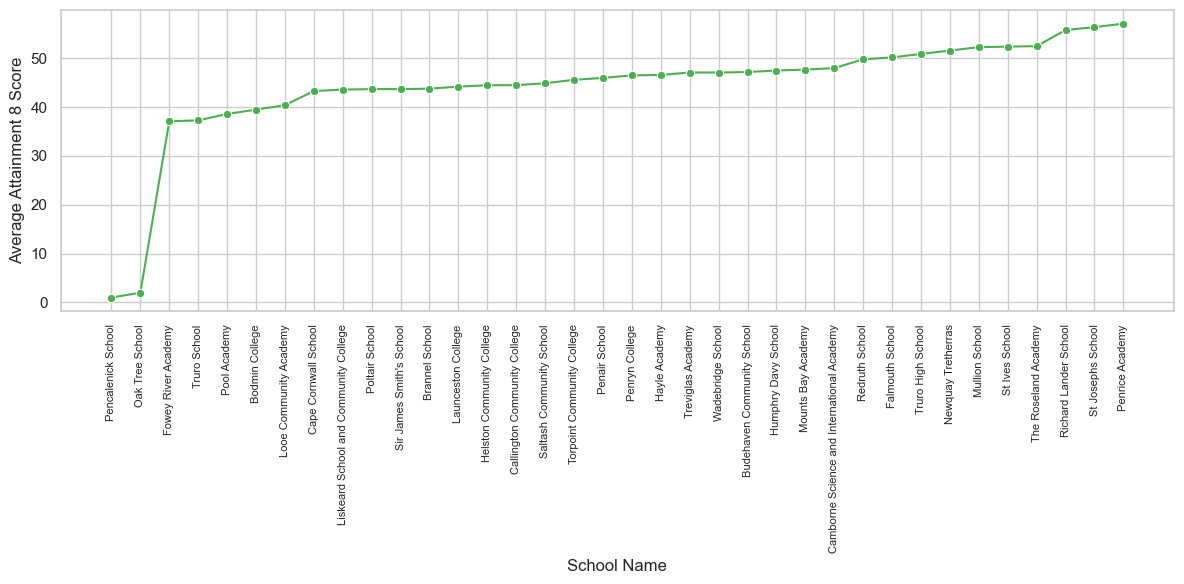

In [66]:
cornwall_filtered = (cornwall_df
    .query("Year == '2022' and ATT8SCR not in ['SUPP', 'NE']")
    .assign(ATT8SCR=lambda df: pd.to_numeric(df['ATT8SCR'], errors='coerce'))
    .groupby('SchName', as_index=False)
    .agg(average_ATT8SCR=('ATT8SCR', 'mean')))
cornwall_filtered = cornwall_filtered.sort_values('average_ATT8SCR')
cornwall_filtered['SchName'] = pd.Categorical(cornwall_filtered['SchName'], 
                                               categories=cornwall_filtered['SchName'], 
                                               ordered=True)
plt.figure(figsize=(12, 6))
sns.lineplot(data=cornwall_filtered, x='SchName', y='average_ATT8SCR', marker='o', color='#4caf50') 
plt.xlabel('School Name', fontsize=12)
plt.ylabel('Average Attainment 8 Score', fontsize=12)
plt.xticks(rotation=90, fontsize=8)
plt.tight_layout()
plt.show()

fig_cornwall = px.line(
    cornwall_filtered,
    x='SchName',
    y='average_ATT8SCR',
    title='Average Attainment 8 Scores for Cornwall Schools in 2021-2022',
    markers=True,
    labels={"SchName": "School Name", "average_ATT8SCR": "Average Attainment 8 Score"}
)

# Update layout for x-axis tick angle
fig_cornwall.update_layout(xaxis_title='School Name', yaxis_title='Average Attainment 8 Score', xaxis=dict(tickangle=90))
fig_cornwall.show()